# Genetic algorithm with python

### Importance
Genetic algorithm is a stochastic optimization method inspired by the phenomenon of evolution.
It is widely used to find the optimal solution for systems with wide variety of complexity levels.
Some of its important applications include optimizing hyperparameters of neural networks, decision trees, etc. 
 
### Scope of tutorial and what you learn

In this tutorial, we introduce the basics of Genetic algorithm. 
We also develop a module for genetic algorithm in Python language. 
We use the code and some examples to demonstrate how this technique really works. 

### Outline

\- [What is Genetic Algorithm?](#def)<br>
\- [Genetic algorithm basics](#basics)<br>
&emsp;\- [Binary representation of a variable](#binary)<br>
&emsp;\- [Binary representation of a potential solution with multiple variables](#binary-multivar)<br>
&emsp;\- [Fitness function and fitness value](#fitness)<br>
\- [Genetic algorithm steps](#steps)<br>
\- [Genetic algorithm implementation in Python](#ga-python)<br>
\- [Examples](#examples)<br>
&emsp;\- [Example #1: Univariate Function](#example-1)<br>
&emsp;\- [Example #2: Multivariable & Multimodal Problem](#example-2)<br>
\- [Recap](#recap)<br>
\- [Quiz](#quiz)<br>

<a id='def'></a>
## What is Genetic Algorithm?

Genetic algorithm (GA) is a metaheuristic inspired by the process of natural selection.
It aims at finding a partial search algorithm that may provide a sufficiently good solution for a given optimization problem.
In order to achieve that, GA tries to use the biologically-inspired operators such as mutation, crossover and 
selection. Some of the GA applications include optimizing hyperparameters of a neural network, decision trees, etc. 

<a id='basics'></a>
## Genetic algorithm basics

<a id='binary'></a>
### Binary representation of a variable
In genetic algorithm, each variable is considered as a binary sequence with a specified length.
For example <font color="red">x=14</font> can be represented as <font color="red">1110</font> if you choose to have 4 bits, or <font color="red">001110</font> if you choose to have 6 bits.

You can use the built-in function **bin** to convert an **integer** number to a binary string prefixed with "0b" as shown below:

In [1]:
bin(14)

'0b1110'

In [2]:
bin(-14)

'-0b1110'

However, we are not limited to integer type when using GA. So, you may ask _how to represent float variables as a binary sequence?!_ Let me explain it.

The idea behind GA is to search for an optimal solution over a specified parameter space. 
For example, let's assume we look for the maximum of a univariate function like $f(x)=1-x^2+3x^3-x^4$ over \[-5,5\].
Let's say we consider 4 bits to represent the **x** variable. The search space \[-5,5\] is then divided into $2^4$ bins of 0.625-unit long, _i.e._ $(5-(-5))/16$.

Now, each float value can be represented by one of the 16 bins. For example:
<br>
<br>
<font color="green">
Any value smaller than -4.375 falls in the first bin with index of 0.<br>
Any value in the range \[-4.375, -3.75) falls in the second bin with index of 1.<br>
Any value in the range \[-3.75, -3.125) falls in the third bin with index of 2.<br>
...<br>
Any value equal to or greater than 4.375 falls in the last bin with index of 15.<br>
</font>

As a result, now, we can represent any float value as a binary sequence with a finite number of bits. 
For example: 
<br>
<br>
<font color="red">x=-4.5</font> falls in the first bin with index of 0, and is represented as <font color="red">0000</font>.<br>

<font color="red">x=-0.5</font> falls in the bin with index of 7, and is represented as <font color="red">0111</font>.<br>

<font color="red">x=1.674902302395</font> falls in the bin with index of 10, and is represented as <font color="red">1010</font>.<br>

<font color="red">x=1.674902302395</font> falls in the bin with index of 10, and is represented as <font color="red">1010</font>.<br>

<font color="red">x=4.75</font> falls in the bin with index of 15, and is represented as <font color="red">1111</font>.<br>



You may have already noticed that one of the ramifications of this approach is that, we lose accuracy. That is, an infinite number of different float values can be represented by the same binary sequence. For example, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, and any other value in the range \[0, 0.625) is represented by the bin with index of 8. That means, if we find the optimal solution, it can potentially have some level of error due to the fact that we represent an infinite space with a finite set of bins. However, as mentioned previously, the genetic algorithm aims at finding an optimal solution that is sufficiently good. Its goal is not to find the exact optimal solution. After all, the genetic algorithm is a stochastic optimization technique!

The error associated with binning the space can be theoretically reduced by increasing the number of bits; the more number of bits, the smaller the size of the bins, and the higher the resolution/accuracy. However, the computational cost increases with the number of bits. So, there should be a trade-off between the resolution and the computational cost.

<a id='binary-multivar'></a>
### Binary representation of a potential solution with multiple variables

The genetic algorithm considers each potential solution as a binary sequence, also called **chromosome** (a term borrowed from biology), representing all the unknown variables. For example, let's assume we want to find the optimal solution for a problem with four variables: $u$, $v$, $x$, and $y$. If we consider four bits to represent each variable, each potential solution sequence will consist of 16 bits; four bits for each variable:<br>

<font color="red">$u=u_0u_1u_2u_3$</font>,<br>
<font color="green">$v=v_0v_1v_2v_3$</font>,<br>
<font color="blue">$x=x_0x_1x_2x_3$</font>, and<br>
<font color="orange">$y=y_0y_1y_2y_3$</font>.

To better understand the concept, assume each variable can vary in the range \[-5,5\].
Then, the sequence <font color="red">1101</font><font color="green">0101</font><font color="blue">0010</font><font color="orange">1111</font>
represents the variables 
<font color="red">u=3.2</font>,
<font color="green">v=-1.4142</font>,
<font color="blue">x=-3.1415</font>, and
<font color="orange">y=4.81</font>.

<a id='fitness'></a>
### Fitness function and fitness value

In genetic algorithm, a potential solution is assessed and assigned a score reflecting how good/fit it is.
The assessment is done using a function called **fitness function**. 
Fitness function gets a potential solution as input and outputs a score that is called **fitness value**.
The fitness value is an indicator showing how **fit**, or how good, the solution is.

<a id='steps'></a>
## Genetic algorithm steps

The genetic algorithm starts with an initial randomly-chosen pool/population of candidates. Each candidate is a binary sequence (chromosome) representing all the unknown variables.
The initial population of chromosomes forms the first **generation**.

The underlying idea of genetic algorithm is to let the chromosomes evolve from one generation to another, to lead to populations with chromosomes that have higher quality (higher fitness values). 
In order to achieve that, the genetic algorithm applies multiple biologically-inspired operations on the population of each generation, the most common ones of which are **selection**, **crossover**, and **mutation**.

### Selection
This operator aims at selecting some of the fittest chromosomes to serve as **parents** for producing the next generation of chromosomes (**children**). 
There are various ways to implement a selection operator.

We can select the parents based on a probability distribution derived from the fitness values distribution. In this approach, the chromosomes with higher fitness values are more likely to be selected.
To make it more clear, assume we have <font color="navy">3 chromosomes</font> with fitness values of 
<font color="red">0.5</font>, <font color="blue">1.5</font>, and <font color="green">4.0</font>.<br>

The probability of the <font color="red">first chromosome</font> to be selected is $0.5/(0.5+1.5+4.0)=1/12\sim$ <font color="red">0.083</font>.<br>

The probability of the <font color="blue">second chromosome</font> to be selected is $1.5/(0.5+1.5+4.0)=3/12=$ <font color="blue">0.25</font>.<br>

The probability of the <font color="green">third chromosome</font> to be selected is $4.0/(0.5+1.5+4.0)=8/12\sim$ <font color="green">0.667</font>.<br>

***Tournament selection***, is another selection algorithm. In this method, we randomly choose _k_ candidates from the population. From the _k_ chosen chromosomes, we select the one with the highest fitness value as the selected parent. We can repeat this process as many times as needed to select all the parents that we need.

### Crossover
This operator aims at mimicking the recombination of chromosomes.
It acts on a pair of parent chromosomes to create two children.
The way it is accomplished is by randomly selecting one of the bits of the chromosomes as the split point.
Both parent chromosomes are split from the same split point.
The two children chromosomes are, then, created by swapping one of the two resulted segments of the parent chromosomes.

For example, assume we want to apply the crossover operation on two chromosomes <font color="green">110100101101</font> and <font color="green">011001111000</font>, and the _current_ split point is randomly chosen to be the fourth bit of chromosomes. That means, each chromosome is split into two segments from its fourth bit:<br>

<font color="red">110</font><font color="blue">100101101</font><br>
<font color="green">011</font><font color="orange">001111000</font><br>

By swapping one of the first or second segments of the parents, the children chromosomes 
<font color="green">110001111000</font> and <font color="green">011100101101</font> are created:<br>

<font color="red">110</font><font color="orange">001111000</font><br>
<font color="green">011</font><font color="blue">100101101</font><br>

Finally, it should be noted that we need to specify a probability for the crossover operation.
For example, the probability of 0.8 means that the two children are created from the crossover operation with the probability of 0.8, while they can be remaining the same as their parents, with the probability of 0.2.

### Mutation
As its name implies, the mutation operator creates a mutation in chromosome by reversing the value of a bit from 0 to 1, or from 1 to 0.
For example, the chromosome<br>

<font color="blue">110</font><font color="red">0</font><font color="blue">001</font>

can mutate into<br>

<font color="blue">110</font><font color="red">1</font><font color="blue">001</font>.

The probability of mutation is usually very low, but it plays an important role in genetic algorithm.
The mutation operator allows for exploring the unseen potential solutions which may have a higher fitness value.
Having this measure in place helps GA to escape from the local optimal solutions, guiding towards more optimal, and hopefully, global optimal solution.

<a id='ga-python'></a>
## Genetic algorithm implementation in Python

In this section, we develop a genetic algorithm class in Python. In the following sections, we will use this class to solve some problems to demonstrate how the genetic algorithm works.

In the following, you can see the Python code I have developed for the genetic algorithm. I have tried to document every step so it serves as a self-explanatory guide.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class ga:
    def __init__(self, **kwargs):
        
        self.n_var = kwargs.pop("n_var", 1)
        self.n_gen = kwargs.pop("n_gen", 10)
        self.n_pop = kwargs.pop("n_pop", 10)
        
        #--------------------------------------------------
        #setting the number of bits
        #--------------------------------------------------
        """
        The variable "n_bit" is a list. For example, for a one-variable system:
        n_bit=[8]
        
        Or, for a three-variable system:
        n_bit=[8, 2, 16]
        """
        self.n_bit = kwargs.pop("n_bit", [8]*self.n_var)
        
        #--------------------------------------------------
        #setting the bounds of variables
        #--------------------------------------------------
        """
        The variable "bound" is a list of list. For example, for a one-variable system:
        bound=[[0,1]]
        
        Or, for a three-variable system:
        bound=[[0,1], [-5,5], [0,10]]
        """
        self.bound = kwargs.pop("bound", [[0 , 1]]*self.n_var)

        #--------------------------------------------------
        #The "k" parameter in tournament selection
        #--------------------------------------------------
        self.tournament_k = kwargs.pop("tournament_k", 3)

        #--------------------------------------------------
        #setting the objective function
        #--------------------------------------------------
        self.objective = kwargs.pop("objective", self.objective_func)        

        #--------------------------------------------------
        #probability of crossover and mutation.
        #--------------------------------------------------
        self.p_c = kwargs.pop("p_c", 0.8)
        self.p_m = kwargs.pop("p_m", 0.01)
        
        #--------------------------------------------------
        # initial population
        #--------------------------------------------------
        #calculating the size of chromosomes
        self.chrom_size = sum(self.n_bit)
        #population of chroms
        self.chrom_pop = np.random.randint(
            0,2, size=self.n_pop*self.chrom_size).reshape((self.n_pop, self.chrom_size))
        
        #--------------------------------------------------
        # initial declaration
        #--------------------------------------------------
        self.fit_vals = np.ones(self.n_pop)*-1e9
        self.fit_max_list = np.array(())
        self.this_iter = 0
        
        #--------------------------------------------------
        #reproducibility by fixing the random seed
        #--------------------------------------------------
        if kwargs.get('np_random_seed', False):
            np.random.seed(kwargs.pop('np_random_seed'))
        
        #--------------------------------------------------
        #setting the precision only for verbose=True
        #--------------------------------------------------
        self.num_dec_var = 3
        self.num_dec_fit = 3
    
    
    def select_one_parent(self, tournament_k=3):
        """
        selecting one parent chromosome based on "tournament selection"

        Parameters
        ----------
        tournament_k : integer, optional
            k in tournament selection. The default is 3.

        Returns
        -------
        integer
            index of selected parent chromosome from the population.

        """
        ind_sel = np.random.choice(self.n_pop, tournament_k, replace=False)
        ind_best_from_sel = np.argmax(self.fit_vals[ind_sel])
        return ind_sel[ind_best_from_sel]
    
    def evolve(self, n_gen=None, verbose=True):
        """      
        Evolution for a given number of iterations/generations

        Parameters
        ----------
        n_gen : integer, optional
            number of generations. The default is None.
        verbose : Bool, optional
            To display info while running. The default is True.

        Returns
        -------
        None.

        """
        #------------------------------------------------
        #number of generations is set from object if not given
        #------------------------------------------------
        if n_gen is None:
            n_gen = self.n_gen
        
        #------------------------------------------------
        # Update fitness values
        #------------------------------------------------
        self.update_fitness()
        
        #------------------------------------------------
        # evolving over generations
        #------------------------------------------------
        for sn_gen in range(n_gen):
                
            #--------------------------------------------
            #selecting parents
            #--------------------------------------------
            ind_parents = [self.select_one_parent(tournament_k=self.tournament_k) 
                           for _ in range(self.n_pop)]
            
            #--------------------------------------------
            #copying the population to undergo operations
            #--------------------------------------------
            self.chrom_pop2 = self.chrom_pop.copy()
            
            #--------------------------------------------
            #crossover
            #--------------------------------------------
            for sn_pair in range(0, self.n_pop, 2):
                p1 = self.chrom_pop[ind_parents[sn_pair]]
                p2 = self.chrom_pop[ind_parents[sn_pair+1]]
                self.chrom_pop2[sn_pair], self.chrom_pop2[sn_pair+1] = self.crossover(p1, p2, p_c=self.p_c)
            
            #--------------------------------------------
            #mutation
            #--------------------------------------------
            for sn_chrom, chrom in enumerate(self.chrom_pop2):
                self.chrom_pop2[sn_chrom] = self.mutate(chrom)

            #--------------------------------------------
            #replacing the population
            #--------------------------------------------
            self.chrom_pop = self.chrom_pop2.copy()
            
            #--------------------------------------------
            #updating the fitness-related quantities
            #--------------------------------------------
            self.update_fitness()

            #--------------------------------------------
            #updating the counter
            #--------------------------------------------
            self.this_iter+=1
            
            #--------------------------------------------
            #verbose
            #--------------------------------------------
            if verbose:
                ind_best_chrom, best_chrom, best_chrom_decoded, best_chrom_fitness = self.get_best_chrom()
                best_chrom_decoded = [np.around(this_var, decimals=self.num_dec_var) for this_var in best_chrom_decoded]
                best_chrom_fitness = np.around(best_chrom_fitness, decimals=self.num_dec_fit)
                print(f'iter: {self.this_iter} \tbest chrom: {best_chrom_decoded} \tmax fitness: {best_chrom_fitness}')
        
        #------------------------------------------------
        # Plotting the max fitness value over generations
        #------------------------------------------------
        self.plot_fitness()
            
    def objective_func(self, x, **kwargs):
        """
        This is the default function object for "objective".
        It serves as a guideline when implementing your own objective function.
        Particularly, input, x, is of the type "list". 

        Parameters
        ----------
        x : list
            list of variables of the problem (a potential solution to be
            assessed).
        **kwargs : dict
            any extra parameters that you may need in your obj. function.

        Returns
        -------
        float
            fitness value

        """
        return -x[0]**2
    
    def get_best_chrom(self):
        """
        outputting information on best chrom in population
        
        Returns
        -------
        ind_best_chrom : integer
            index of best chromosome in the population.
        best_chrom : array
            binary encoding of best chromosome
        best_chrom_decoded : list
            list of variables for the best chrom
        best_chrom_fitness : float
            fitness value of best chrom

        """
        ind_best_chrom = np.argmax(self.fit_vals)
        best_chrom = self.chrom_pop[ind_best_chrom]
        best_chrom_decoded = self.decode_entire_chrom(best_chrom)
        best_chrom_fitness = self.fit_vals[ind_best_chrom]
        return ind_best_chrom, best_chrom, best_chrom_decoded, best_chrom_fitness
    
    def decode_entire_chrom(self, chrom):
        """
        decoding a given chromosome

        Parameters
        ----------
        chrom : array
            a binary encoded chromosome for one or multiple variables

        Returns
        -------
        x : list
            list of decoded variables of the passed chrom

        """
        x=[]
        ind_end = 0
        for sn_var in range(self.n_var):
            ind_start = ind_end
            ind_end = ind_start+self.n_bit[sn_var]
            this_var_decoded = self.decode(chrom[ind_start:ind_end], 
                                           low=self.bound[sn_var][0], 
                                           high=self.bound[sn_var][1])
            x.append(this_var_decoded)
        return x
    
    def eval_fit(self, chrom, **kwargs):
        """
        evaluating the fitness of a given chrom

        Parameters
        ----------
        chrom : array
            a chromosome.
        **kwargs : dict
            a dict to pass any needed parameter when evaluating the fitness

        Returns
        -------
        float
            fitness value of the passed chrom

        """
        x = self.decode_entire_chrom(chrom)
        return self.objective(x, **kwargs)
    
    def plot_fitness(self):
        """
        plotting the max fitness value over generations
        """
        plt.plot(self.fit_max_list)
    
    def update_fitness(self, **kwargs):
        """
        updating the fitness values

        Parameters
        ----------
        **kwargs : dict
            a dcit to pass any desired parameter to be used in fitness func

        Returns
        -------
        None.
        """
        for sn_chrom, chrom in enumerate(self.chrom_pop):
            self.fit_vals[sn_chrom] = self.eval_fit(chrom, **kwargs)
        self.fit_max_list = np.append(self.fit_max_list, self.fit_vals.max())
    
    @staticmethod
    def decode(chrom, low=0, high=1):
        """
        decoding a binary encoded array
        
        Parameters
        ----------
        chrom : array
            binary encoded array
        low : float, optional
            lower limit of the space for binning. The default is 0.
        high : float, optional
            upper limit of the space for binning. The default is 1.

        Returns
        -------
        x : float
            decoded value of the passed binary-encoded array
        """
        decoded_num = np.dot(chrom, 2**np.arange(chrom.size)[::-1])
        x = low + decoded_num*(high-low)/(2**chrom.size-1)
        return x
    
    @staticmethod
    def binary_code(val, n_bit, low=0, high=None):
        """
        binary encoding a float value

        Parameters
        ----------
        val : float
            value to be encoded
        n_bit : integer
            number of bits.
        low : float, optional
            lower limit of space for binning. The default is 0.
        high : float, optional
            upper limit of space for binning. The default is None.

        Returns
        -------
        binary_val : array
            binary representation of the passed float value.
        """
        if high is None:
            high=2**n_bit
        binary_val = np.zeros(n_bit)
        ind_bin_max=2**n_bit
        ind_bin = int((val-low)/(high-low)*ind_bin_max)
        if ind_bin>=ind_bin_max:
            ind_bin=ind_bin_max-1
        elif ind_bin<0:
            ind_bin=0
        str_val = bin(ind_bin).split('b')[1]
        for sn, bit in enumerate(str_val[::-1]):
            binary_val[-1-sn]=int(bit)
        return binary_val
    
    def crossover(self, p1, p2, p_c=None):
        """
        point cross-over operator

        Parameters
        ----------
        p1 : array
            parent #1.
        p2 : array
            parent #2.
        p_c : float, optional
            probability of cross-over. The default is None.

        Returns
        -------
        chrom1 : array
            child #1.
        chrom2 : array
            child #2.

        """
        if p_c is None:
            p_c=self.p_c
        chrom1 = p1.copy()
        chrom2 = p2.copy()
        if np.random.rand()<p_c:
            split_pos = np.random.randint(0, p1.size)
            chrom1[split_pos:] = p2[split_pos:]
            chrom2[split_pos:] = p1[split_pos:]   
        return chrom1, chrom2
    
    def mutate(self, chrom, p_m=None):
        """
        mutation operator

        Parameters
        ----------
        chrom : array
            chromosome.
        p_m : float, optional
            probability of mutation. The default is None.

        Returns
        -------
        chrom : array
            chrom after applying the operator.
        """
        if p_m is None:
            p_m=self.p_m
        chrom = chrom.copy()
        for sn, bit in enumerate(chrom):
            if np.random.rand()<p_m:
                chrom[sn] = 1 - bit
        return chrom
            
    def print_pop(self):
        """
        printing the population
        """
        for chrom in self.chrom_pop:
            print(chrom)

<a id='examples'></a>
## Examples
Now, that we have developed a class for genetic algorithm, let's look at some examples demonstrating how it works.

<a id='example-1'></a>
### Example #1:  Univariate function

Let's consider the univariate function $f(x)=1-x^2+3x^3-x^4$. 
Our goal is to find the maximum of function over \[-5,5\] using the genetic algorithm.
Let's define a function in Python:

In [4]:
def obj_func(x):
    """
    our fitness function

    Parameters
    ----------
    x : list
        list of variables of the problem.

    Returns
    -------
    f : float
        fitness value.
    """
    f = 1-x[0]**2+3*x[0]**3-x[0]**4
    return f

This is how the function looks like:

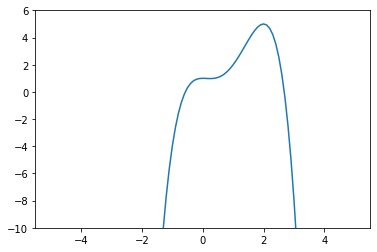

In [5]:
import matplotlib.pyplot as plt

x=np.linspace(-5,5,101)
f=[obj_func([x]) for x in x]
plt.plot(x, f)
plt.ylim(-10,6)
plt.show()

The coordinates of the maximum are (2, 5).

Now, let's use the genetic algorithm.
We instantiate the ***ga class*** and point to it with a variable named _prob_.
We start with 5 bits to represent the single variable of our problem (**x**).
We also consider 10 chromosomes in the population. 
The probability of cross-over and mutation is set to be 0.8 and 0.01, respectively.
Here are the results for 10 generations:

iter: 1 	best chrom: [1.129] 	max fitness: 2.418
iter: 2 	best chrom: [1.129] 	max fitness: 2.418
iter: 3 	best chrom: [1.129] 	max fitness: 2.418
iter: 4 	best chrom: [2.419] 	max fitness: 3.369
iter: 5 	best chrom: [2.419] 	max fitness: 3.369
iter: 6 	best chrom: [2.419] 	max fitness: 3.369
iter: 7 	best chrom: [2.419] 	max fitness: 3.369
iter: 8 	best chrom: [2.419] 	max fitness: 3.369
iter: 9 	best chrom: [2.419] 	max fitness: 3.369
iter: 10 	best chrom: [2.419] 	max fitness: 3.369


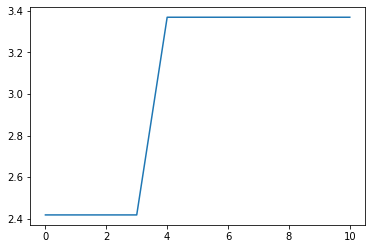

In [6]:
n_var = 1
n_bit_each_var=5

bound=[[-5,5]]*n_var
n_bit=[n_bit_each_var]*n_var
prob = ga(objective=obj_func, 
          n_pop=10, n_gen=10, p_c=0.8, p_m=0.01,
          n_var=n_var, n_bit=n_bit, bound=bound, 
          np_random_seed=12345)

prob.evolve(n_gen=10, verbose=1)

We can also get the best chromosome's detailed information as follows, wherein the first item of the output refers to the index of chromosome in the population, the second item shows the binary-encoded representation of the found optimal solution, the third component is the decoded solution, and the last component shows the fitness value of the found optimal solution.

In [7]:
prob.get_best_chrom()

(0, array([1, 0, 1, 1, 1]), [2.419354838709677], 3.3693289053524538)

If we print all the chromosomes available in the population after 10 generations, we have:

In [8]:
prob.print_pop()

[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]
[1 0 1 1 1]


You can see that all chromosomes are the same, and their decoded value is:

In [9]:
for chrom in prob.chrom_pop:
    print(prob.decode_entire_chrom(chrom))

[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]
[2.419354838709677]


It is worth mentioning that the cross-over operation does not affect a pair of identical parents. So, when the population is filled with a specific chromosome, the only hope for a better chromosome in future is to have a mutation leading to a better chromosome. The fitter chromosome will then be selected for the next generation allowing a higher-quality generation to be obtained.

To let mutation help the system, we need to either increase its occurrence probability, or run the GA for a larger number of generations. Here, we continue the GA for another 50 generations. Here are the results for the entire 60 generations:

iter: 11 	best chrom: [2.419] 	max fitness: 3.369
iter: 12 	best chrom: [2.419] 	max fitness: 3.369
iter: 13 	best chrom: [2.419] 	max fitness: 3.369
iter: 14 	best chrom: [2.419] 	max fitness: 3.369
iter: 15 	best chrom: [2.419] 	max fitness: 3.369
iter: 16 	best chrom: [2.419] 	max fitness: 3.369
iter: 17 	best chrom: [2.419] 	max fitness: 3.369
iter: 18 	best chrom: [1.774] 	max fitness: 4.698
iter: 19 	best chrom: [1.774] 	max fitness: 4.698
iter: 20 	best chrom: [1.774] 	max fitness: 4.698
iter: 21 	best chrom: [1.774] 	max fitness: 4.698
iter: 22 	best chrom: [1.774] 	max fitness: 4.698
iter: 23 	best chrom: [1.774] 	max fitness: 4.698
iter: 24 	best chrom: [1.774] 	max fitness: 4.698
iter: 25 	best chrom: [1.774] 	max fitness: 4.698
iter: 26 	best chrom: [1.774] 	max fitness: 4.698
iter: 27 	best chrom: [1.774] 	max fitness: 4.698
iter: 28 	best chrom: [1.774] 	max fitness: 4.698
iter: 29 	best chrom: [1.774] 	max fitness: 4.698
iter: 30 	best chrom: [1.774] 	max fitness: 4.698


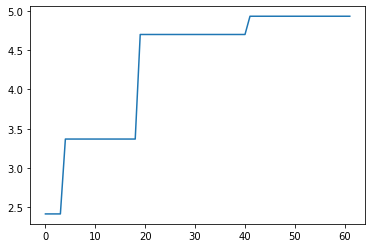

In [10]:
prob.evolve(n_gen=50, verbose=1)

We can see, that the maximum fitness value increases over time due to the more optimal solutions discovered by the mutation operation. Here is more information about the obtained optimal solution after 60 generations:

In [11]:
prob.get_best_chrom()

(0, array([1, 0, 1, 1, 0]), [2.096774193548387], 4.929824010498944)

We can see that the obtained optimal solution has coordinates of (2.09677, 4.9298) which, now, are much closer to the exact optimal coordinates (2, 5).

Again, looking at the chromosomes available in the population shows all chromosomes are identical at the end of 60 generation:

In [12]:
prob.print_pop()

[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]


### Effects of mutation probability

Let's increase the mutation probability to 0.1. Here are the results for 10 generations. The results show a much better performance than the previous case with mutation probability to 0.01.

iter: 1 	best chrom: [2.097] 	max fitness: 4.93
iter: 2 	best chrom: [2.097] 	max fitness: 4.93
iter: 3 	best chrom: [2.097] 	max fitness: 4.93
iter: 4 	best chrom: [2.097] 	max fitness: 4.93
iter: 5 	best chrom: [2.097] 	max fitness: 4.93
iter: 6 	best chrom: [2.097] 	max fitness: 4.93
iter: 7 	best chrom: [2.097] 	max fitness: 4.93
iter: 8 	best chrom: [2.097] 	max fitness: 4.93
iter: 9 	best chrom: [2.097] 	max fitness: 4.93
iter: 10 	best chrom: [2.097] 	max fitness: 4.93


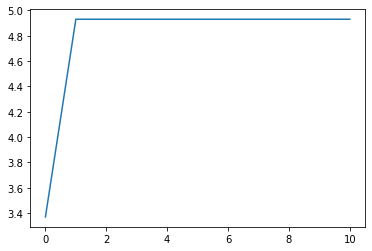

In [13]:
n_var = 1
n_bit_each_var=5

bound=[[-5,5]]*n_var
n_bit=[n_bit_each_var]*n_var
prob = ga(objective=obj_func, 
          n_pop=10, n_gen=10, p_c=0.8, p_m=0.1,
          n_var=n_var, n_bit=n_bit, bound=bound, 
          np_random_seed=12345)

prob.evolve(n_gen=10, verbose=1)

Below, you can see the results for mutation probability of 0.2 and 0.4.

iter: 1 	best chrom: [2.419] 	max fitness: 3.369
iter: 2 	best chrom: [1.774] 	max fitness: 4.698
iter: 3 	best chrom: [1.774] 	max fitness: 4.698
iter: 4 	best chrom: [2.097] 	max fitness: 4.93
iter: 5 	best chrom: [2.097] 	max fitness: 4.93
iter: 6 	best chrom: [1.452] 	max fitness: 3.629
iter: 7 	best chrom: [2.097] 	max fitness: 4.93
iter: 8 	best chrom: [1.774] 	max fitness: 4.698
iter: 9 	best chrom: [2.097] 	max fitness: 4.93
iter: 10 	best chrom: [2.097] 	max fitness: 4.93


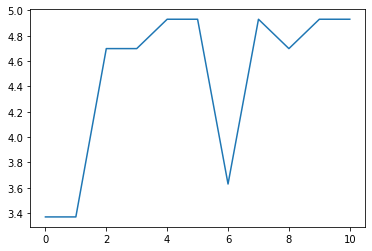

In [14]:
n_var = 1
n_bit_each_var=5

bound=[[-5,5]]*n_var
n_bit=[n_bit_each_var]*n_var
prob = ga(objective=obj_func, 
          n_pop=10, n_gen=10, p_c=0.8, p_m=0.2,
          n_var=n_var, n_bit=n_bit, bound=bound, 
          np_random_seed=12345)

prob.evolve(n_gen=10, verbose=1)

iter: 1 	best chrom: [1.774] 	max fitness: 4.698
iter: 2 	best chrom: [2.097] 	max fitness: 4.93
iter: 3 	best chrom: [2.419] 	max fitness: 3.369
iter: 4 	best chrom: [2.097] 	max fitness: 4.93
iter: 5 	best chrom: [1.774] 	max fitness: 4.698
iter: 6 	best chrom: [1.452] 	max fitness: 3.629
iter: 7 	best chrom: [2.097] 	max fitness: 4.93
iter: 8 	best chrom: [1.452] 	max fitness: 3.629
iter: 9 	best chrom: [2.097] 	max fitness: 4.93
iter: 10 	best chrom: [1.774] 	max fitness: 4.698


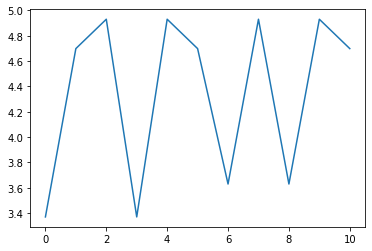

In [15]:
n_var = 1
n_bit_each_var=5

bound=[[-5,5]]*n_var
n_bit=[n_bit_each_var]*n_var
prob = ga(objective=obj_func, 
          n_pop=10, n_gen=10, p_c=0.8, p_m=0.4,
          n_var=n_var, n_bit=n_bit, bound=bound, 
          np_random_seed=12345)

prob.evolve(n_gen=10, verbose=1)

If we keep increasing the mutation probability to 0.2 and 0.4, we see that the performance can deteriorate due to **too much exploration**. There should generally be a trade-off between <font color="red">exploration</font> (looking at unseen potential solutions) and <font color="red">exploitation</font> (exploiting what has already been experienced).
The mutation probability of _1/L_, wherein _L_ denotes the chromosome length (number of bits in one chromosome), is usually a good starting point. It is equivalent to one mutation per chromosome in average.

<a id='example-2'></a>
### Example #2: Multivariable & Multimodal Problem

In this example, let's look at a multivariable (x and y) and multi-modal problem, _i.e._ an optimization problem with multiple local optimal solutions. 
Our goal is to find the global maximum of the following function:

$r<a: f(r)=r(a-r)(sin(\frac{2\pi}{p}x)^2+cos(\frac{2\pi}{p}y)^2)$<br>
$r>=a: f(r)=0$,<br>

wherein _r_ shows the distance from the origin, _i.e._ $r=\sqrt{x^2+y^2}$. Let's define this function in Python:

In [16]:
def obj_func(x, a=5, p=3):
    r = (x[0]**2+x[1]**2)**0.5
    if r<a:
        f=((np.sin(2*np.pi/p*x[0])**2+np.cos(2*np.pi/p*x[1]))**2)*r*(a-r)
    else:
        f=0        
    return f

And, a function to plot a given function using as contour or surface:

In [17]:
def plot_func(x, y, func, type_plt=0):
    lx=len(x)
    ly=len(y)
    f=np.zeros((lx, ly))
    Y, X = np.meshgrid(x, y)
    for i in range(lx):
        for j in range(ly):
            f[i,j]=func([x[i], y[j]])
    print(f'f.max: {np.amax(f)}')

    #contour plot
    if type_plt==0:
        fig = plt.figure()
        plt.contourf(X,Y,f)
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
    
    #surface plot
    elif type_plt==1:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        ax.plot_surface(X,Y,f)
        plt.xlabel('x')
        plt.ylabel('y')

Here, is how our multi-modal function looks like for a=5 and p=3:

f.max: 24.685775129249524


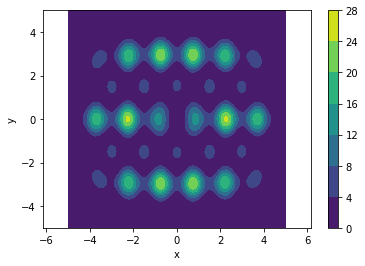

In [18]:
x=y=np.linspace(-5,5,150)
plot_func(x, y, obj_func, 0)

f.max: 24.685775129249524


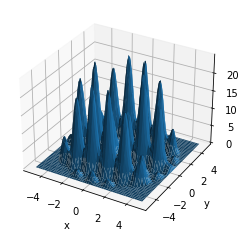

In [19]:
plot_func(x, y, obj_func, 1)

Now, let's use our developed genetic algorithm class to see how it performs on a multivariable and multimodal problem. 

We consider 8 bits for each variable of x and y. The population size is 100, and the probability of mutation and cross-over is 0.02 and 0.85, respectively. 
Here is the outcome of evolution for 50 generations:

iter: 1 	best chrom: [-2.235, -0.118] 	max fitness: 23.962
iter: 2 	best chrom: [-2.235, -0.118] 	max fitness: 23.962
iter: 3 	best chrom: [-2.235, -0.118] 	max fitness: 23.962
iter: 4 	best chrom: [-2.235, -0.118] 	max fitness: 23.962
iter: 5 	best chrom: [-2.235, -0.118] 	max fitness: 23.962
iter: 6 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 7 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 8 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 9 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 10 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 11 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 12 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 13 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 14 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 15 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 16 	best chrom: [-2.235, -0.039] 	max fitness: 24.614
iter: 17 	best chrom: [-2.235, -0.039] 	max fitne

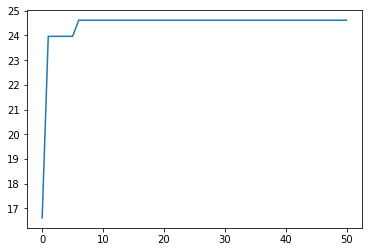

In [20]:
n_var = 2
n_bit_each_var=8

bound=[[-10, 10]]*n_var
n_bit=[n_bit_each_var]*n_var
prob = ga(objective=obj_func, 
          n_pop=100, n_gen=10, p_c=0.85, p_m=0.02,
          n_var=n_var, n_bit=n_bit, bound=bound, 
          np_random_seed=12345)

prob.evolve(n_gen=50, verbose=1)

The specific function studied here (with the specified _a_ and _p_ values) has two global maximums with the magnitude of $\sim 24.7$. 
In this case, the genetic algorithm converged to the maximum on the positive side of x-direction. You may see other results on your machine, particularly by using a seed number (_np_random_seed_ in the constructor of _ga_ class) different from what we used here.

<a id='recap'></a>
## Recap

\- Genetic algorithm (GA) is a stochastic optimization technique inspired by the process of natural selection. 

\- It aims at finding a partial search algorithm that may provide a sufficiently good solution for a given optimization problem. 

\- Genetic algorithm tries to use the biologically-inspired operators such as mutation, crossover and selection to let potential solutions to ***evolve*** over time, from one generation to another, towards higher quality solutions.

\- The ***crossover*** operation aims at producing higher quality children from their parents, while ***mutation*** allows exploring unseen potential solutions.

\- When setting the mutation probability, you should consider a trade-off between exploration (looking at unseen potential solutions) and exploitation (exploiting what has already been experienced).

<a id='quiz'></a>
## Quiz
Finally, I end this tutorial with a quiz!

1\. What will happen if you set the mutation probability equal to 0?<br>

2\. What will happen if you set the mutation probability equal to 1?<br>

## Final remarks

In this tutorial, we introduced the basics of ***Genetic algorithm*** and implemented this method in Python language.
We discussed that genetic algorithm (GA) is a stochastic optimization method inspired by the phenomenon of evolution.
The GA aims at finding a partial search algorithm that may provide a sufficiently good solution for a given optimization problem.
It uses the biologically-inspired operations such as mutation, crossover and selection to allow the potential solutions to evolve, from one generation to another, towards the higher quality solutions.

We saw that mutation allows exploring unseen potential solutions, which is crucially important to help the optimizer to escape from the local optimal solution. However, there should be a trade-off between exploration (looking at unseen potential solutions) and exploitation (exploiting what has already been experienced). A too much large mutation ratio results in too much noise, not allowing the GA to converge.

I hope you found this article useful.
Please do not hesitate to let us know if you have any questions or comments by leaving a note below, or [contacting us](https://soardeepsci.com/contact/).
Also, please feel free to check out the rest of the articles on [SoarDeepSci](https://soardeepsci.com/blog/).